### Installing libraries and notebooks

In [0]:
%pip install -r '/dbfs/mnt/sdscdata/requirements.txt'

Python interpreter will be restarted.
Requirement already satisfied: keras-nightly==2.5.0.dev2021032900 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 1)) (2.5.0.dev2021032900)
Requirement already satisfied: tensorflow==2.5.0 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 2)) (2.5.0)
Collecting scikit-image==0.17.2
 Downloading scikit_image-0.17.2-cp38-cp38-manylinux1_x86_64.whl (12.4 MB)
Requirement already satisfied: scikit-learn==0.24.1 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 4)) (0.24.1)
Collecting labelme==4.5.9
 Downloading labelme-4.5.9.tar.gz (1.5 MB)
Collecting pycocotools==2.0.2
 Downloading pycocotools-2.0.2.tar.gz (23 kB)
Requirement already satisfied: scipy==1.6.2 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 7)) (1.6.2)
Collecting tqdm==4.62.2
 Downloading tqdm-4.62.2-py2.py3-none-any.whl (76 kB)
Requirement already satisfied: h5py==3.1.0 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 9)) (3.1.0)
Requirement already satisfied: numpy==1.19.2 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 10)) (1.19.2)
Requirement already satisfied: pandas==1.2.4 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (1.2.4)
Collecting imgviz>=0.11.0
 Downloading imgviz-1.4.1.tar.gz (7.7 MB)
 Installing build dependencies: started
 Installing build dependencies: finished with status 'done'
 Getting requirements to build wheel: started
 Getting requirements to build wheel: finished with status 'done'
 Preparing wheel metadata: started
 Preparing wheel metadata: finished with status 'done'
Collecting matplotlib<3.3
 Downloading matplotlib-3.2.2-cp38-cp38-manylinux1_x86_64.whl (12.4 MB)
Requirement already satisfied: Pillow>=2.8.0 in /databricks/python3/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (8.2.0)
Requirement already satisfied: PyYAML in /databricks/python3/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (5.4.1)
Collecting qtpy
 Downloading QtPy-1.11.2-py2.py3-none-any.whl (58 kB)
Requirement already satisfied: termcolor in /databricks/python3/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (1.1.0)
Collecting PyQt5!=5.15.3,!=5.15.4
 Downloading PyQt5-5.15.6-cp36-abi3-manylinux1_x86_64.whl (8.3 MB)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas==1.2.4->-r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (2020.5)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas==1.2.4->-r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (2.8.1)
Requirement already satisfied: setuptools>=18.0 in /usr/local/lib/python3.8/dist-packages (from pycocotools==2.0.2->-r /dbfs/mnt/sdscdata/requirements.txt (line 6)) (52.0.0)
Requirement already satisfied: cython>=0.27.3 in /databricks/python3/lib/python3.8/site-packages (from pycocotools==2.0.2->-r /dbfs/mnt/sdscdata/requirements.txt (line 6)) (0.29.23)
Requirement already satisfied: PyWavelets>=1.1.1 in /databricks/python3/lib/python3.8/site-packages (from scikit-image==0.17.2->-r /dbfs/mnt/sdscdata/requirements.txt (line 3)) (1.1.1)
Requirement already satisfied: networkx>=2.0 in /databricks/python3/lib/python3.8/site-packages (from scikit-image==0.17.2->-r /dbfs/mnt/sdscdata/requirements.txt (line 3)) (2.5)
Collecting tifffile>=2019.7.26
 Downloading tifffile-2021.11.2-py3-none-any.whl (178 kB)
Collecting imageio>=2.3.0
 Downloading imageio-2.10.3-py3-none-any.whl (3.3 MB)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/

In [0]:
%pip install scikit-multilearn

Python interpreter will be restarted.
Collecting scikit-multilearn
 Downloading scikit_multilearn-0.2.0-py3-none-any.whl (89 kB)
Installing collected packages: scikit-multilearn
Successfully installed scikit-multilearn-0.2.0
WARNING: You are using pip version 21.0.1; however, version 21.3.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-cd413391-8da5-452f-8520-8b37012131c6/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
import numpy as np
import keras

import tensorflow as tf

from keras.models import Model
from tensorflow.python.keras.models import load_model

import skimage
from skimage.io import imread
from pathlib import Path
import os

In [0]:
%run ./helpers

In [0]:
%run ./labelme

In [0]:
%run ./custom_functions

In [0]:
# loading the scores and the weather station data again, as we need it for submitting our results
label_scores = pd.read_csv('/dbfs/mnt/sdscdata/data/raw/label_scores.csv', sep=';')
labels = list(label_scores.labels.values)
# SA --> mean of the yearly sum of hours of sun over the last years
weather = pd.read_csv('/dbfs/mnt/sdscdata/data/raw/weather_station_file.csv', sep=',')


Python interpreter will be restarted.
Requirement already satisfied: labelme in /local_disk0/.ephemeral_nfs/envs/pythonEnv-cd413391-8da5-452f-8520-8b37012131c6/lib/python3.8/site-packages (4.5.9)
Requirement already satisfied: matplotlib<3.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-cd413391-8da5-452f-8520-8b37012131c6/lib/python3.8/site-packages (from labelme) (3.2.2)
Requirement already satisfied: Pillow>=2.8.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-cd413391-8da5-452f-8520-8b37012131c6/lib/python3.8/site-packages (from labelme) (8.4.0)
Requirement already satisfied: PyYAML in /databricks/python3/lib/python3.8/site-packages (from labelme) (5.4.1)
Requirement already satisfied: imgviz>=0.11.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-cd413391-8da5-452f-8520-8b37012131c6/lib/python3.8/site-packages (from labelme) (1.4.1)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from labelme) (1.19.2)
Requirement already satisfied: qtpy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-cd413391-8da5-452f-8520-8b37012131c6/lib/python3.8/site-packages (from labelme) (1.11.2)
Requirement already satisfied: termcolor in /databricks/python3/lib/python3.8/site-packages (from labelme) (1.1.0)
Requirement already satisfied: PyQt5!=5.15.3,!=5.15.4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-cd413391-8da5-452f-8520-8b37012131c6/lib/python3.8/site-packages (from labelme) (5.15.6)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (1.3.1)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (2.8.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib<3.3->labelme) (1.15.0)
Requirement already satisfied: PyQt5-sip<13,>=12.8 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-cd413391-8da5-452f-8520-8b37012131c6/lib/python3.8/site-packages (from PyQt5!=5.15.3,!=5.15.4->labelme) (12.9.0)
Requirement already satisfied: PyQt5-Qt5>=5.15.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-cd413391-8da5-452f-8520-8b37012131c6/lib/python3.8/site-packages (from PyQt5!=5.15.3,!=5.15.4->labelme) (5.15.2)
WARNING: You are using pip version 21.0.1; however, version 21.3.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-cd413391-8da5-452f-8520-8b37012131c6/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

### Set directories

Also similary to the second session, lets define our Team Path and some directories

In [0]:
TEAM_MOUNT = '/dbfs/mnt/team32storage/'

# Train
IMAGES_DIR_TRAIN = Path(TEAM_MOUNT + 'data/processed/train/JPEGImages')
MASKS_DIR_TRAIN = Path(TEAM_MOUNT + 'data/processed/train/SegmentationClassPNG')
# VAL
IMAGES_DIR_VAL = Path(TEAM_MOUNT + 'data/processed/val/JPEGImages')
MASKS_DIR_VAL = Path(TEAM_MOUNT + 'data/processed/val/SegmentationClassPNG')

IMAGE_SIZE = 512

Last time we loaded the masks from the annotations.json file. This time we want to use the png masks to make it easier for us to increase our data. _(Of course both options can be used for both models as long as the the load functions are adapted accordingly)_

To match the colors in the png format to different classes we define them below:

In [0]:
colors = {# 0: (0, 0, 0), # BG
            1:  (128, 0, 0), # asphalt
            2:  (0, 128, 0), # sealed_other 
            3:  (128, 128, 0), # gravel_clay 
            4:  (0, 0, 128), # field 
            5:  (128, 0, 128), # water 
            6:  (0, 128, 128), # meadow 
            7:  (128, 128, 128), # lawn 
            8:  (64, 0, 0), # pool 
            9:  (192, 0, 0), # roof_other 
            10: (64, 128, 0), # roof_flat_residential 
            11: (192, 128, 0), # roof_pitched_industrial 
            12: (64, 0, 128), # roof_flat_industrial 
            13: (192, 0, 128), # roof_pitched_residental 
            14: (64, 128, 128), # hedge 
            15: (192, 128, 128), # tree_group
            16: (0, 64, 0), # tree 
            17: (128, 64, 0), # vehicle
                } 

n_labels = len(colors)

## Preparing the data

In [0]:
TEAM_MOUNT = '/dbfs/mnt/team32storage/'

# Train
IMAGES_DIR_TRAIN = Path(TEAM_MOUNT + 'data/processed/train/JPEGImages')
MASKS_DIR_TRAIN = Path(TEAM_MOUNT + 'data/processed/train/SegmentationClassPNG')
# VAL
IMAGES_DIR_VAL = Path(TEAM_MOUNT + 'data/processed/val/JPEGImages')
MASKS_DIR_VAL = Path(TEAM_MOUNT + 'data/processed/val/SegmentationClassPNG')

IMAGE_SIZE = 512

In [0]:
%run ./helpers

In [0]:
X_train = load_images([f for f in Path(IMAGES_DIR_TRAIN).glob('*.jpg')], IMAGE_SIZE)

In [0]:
X_train = X_train.astype(float)/255

X_train_mean0 = X_train[:,:,:,0].mean()
X_train_mean1 = X_train[:,:,:,1].mean()
X_train_mean2 = X_train[:,:,:,2].mean()

X_train_std0 = X_train[:,:,:,0].std()
X_train_std1 = X_train[:,:,:,1].std()
X_train_std2 = X_train[:,:,:,2].std()

print(X_train_mean0, X_train_std0)
print(X_train_mean1, X_train_std1)
print(X_train_mean2, X_train_std2)

0.5121559434631898 0.20860198337842734
0.5135619059455974 0.19516940448722397
0.47492319267651373 0.20063213404660432

### Running our Model

In [0]:
dbutils.fs.ls(str(TEAM_MOUNT+"models/"))

Out[24]: [FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_aug_catCE_dropout_02.h5', name='unet_aug_catCE_dropout_02.h5', size=23526908),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_aug_diceloss.h5', name='unet_aug_diceloss.h5', size=26357524),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_aug_focal_loss_dropout_02.h5', name='unet_aug_focal_loss_dropout_02.h5', size=23526908),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_aug_stratSplit_diceloss.h5', name='unet_aug_stratSplit_diceloss.h5', size=294205772),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_resnet50_stratSplit_diceloss_focalloss.h5', name='unet_resnet50_stratSplit_diceloss_focalloss.h5', size=203673444),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_resnet50_stratSplit_diceloss_weighted_focalloss.h5', name='unet_resnet50_stratSplit_diceloss_weighted_focalloss.h5', size=0),
 FileInfo(path='dbfs:/dbfs/mnt/team32storage/models/unet_resnet_aug_stratSplit_weighted_diceloss.h5', name='unet_resnet_aug_stratSplit_weighted_diceloss.h5', size=294205772)]

In [0]:
images_paths = [f for f in Path('/dbfs/mnt/sdscdata/data/raw/test').glob('*.jpeg')]
X = load_images(images_paths, IMAGE_SIZE)

#standardized the data
X = X.astype(float)/255
X[:,:,:,0] = (X[:,:,:,0]-X_train_mean0)/X_train_std0
X[:,:,:,1] = (X[:,:,:,1]-X_train_mean1)/X_train_std1
X[:,:,:,2] = (X[:,:,:,2]-X_train_mean2)/X_train_std2

print(X.mean(), X.std())

-0.03772766829936795 0.8942397665972273

In [0]:
from tensorflow.python.keras.models import load_model
#u_net_model_inf = u_net(IMAGE_SIZE, n_labels)
#u_net_model_inf.load_weights(str(TEAM_MOUNT + "models/latest_unet.h5"))
model_name = 'unet_resnet50_stratSplit_diceloss_focalloss.h5'
model = load_model(str(TEAM_MOUNT+"models/"+model_name), compile=False)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type) Output Shape Param # Connected to 
==================================================================================================
data (InputLayer) [(None, 512, 512, 3) 0 
__________________________________________________________________________________________________
bn_data (BatchNormalization) (None, 512, 512, 3) 9 data[0][0] 
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D) (None, 518, 518, 3) 0 bn_data[0][0] 
__________________________________________________________________________________________________
conv0 (Conv2D) (None, 256, 256, 64) 9408 zero_padding2d[0][0] 
__________________________________________________________________________________________________
bn0 (BatchNormalization) (None, 256, 256, 64) 256 conv0[0][0] 
__________________________________________________________________________________________________
relu0 (Activation) (None, 256, 256, 64) 0 bn0[0][0] 
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 258, 258, 64) 0 relu0[0][0] 
__________________________________________________________________________________________________
pooling0 (MaxPooling2D) (None, 128, 128, 64) 0 zero_padding2d_1[0][0] 
__________________________________________________________________________________________________
stage1_unit1_bn1 (BatchNormaliz (None, 128, 128, 64) 256 pooling0[0][0] 
__________________________________________________________________________________________________
stage1_unit1_relu1 (Activation) (None, 128, 128, 64) 0 stage1_unit1_bn1[0][0] 
__________________________________________________________________________________________________
stage1_unit1_conv1 (Conv2D) (None, 128, 128, 64) 4096 stage1_unit1_relu1[0][0] 
__________________________________________________________________________________________________
stage1_unit1_bn2 (BatchNormaliz (None, 128, 128, 64) 256 stage1_unit1_conv1[0][0] 
__________________________________________________________________________________________________
stage1_unit1_relu2 (Activation) (None, 128, 128, 64) 0 stage1_unit1_bn2[0][0] 
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 130, 130, 64) 0 stage1_unit1_relu2[0][0] 
__________________________________________________________________________________________________
stage1_unit1_conv2 (Conv2D) (None, 128, 128, 64) 36864 zero_padding2d_2[0][0] 
__________________________________________________________________________________________________
stage1_unit1_bn3 (BatchNormaliz (None, 128, 128, 64) 256 stage1_unit1_conv2[0][0] 
__________________________________________________________________________________________________
stage1_unit1_relu3 (Activation) (None, 128, 128, 64) 0 stage1_unit1_bn3[0][0] 
__________________________________________________________________________________________________
stage1_unit1_conv3 (Conv2D) (None, 128, 128, 256 16384 stage1_unit1_relu3[0][0] 
__________________________________________________________________________________________________
stage1_unit1_sc (Conv2D) (None, 128, 128, 256 16384 stage1_unit1_relu1[0][0] 
__________________________________________________________________________________________________
add (Add) (None, 128, 128, 256 0 stage1_unit1_conv3[0][0] 
 stage1_unit1_sc[0][0] 
__________________________________________________________________________________________________
stage1_unit2_bn1 (BatchNormaliz (None, 128, 128, 256 1024 add[0][0] 
__________________________________________________________________________________________________
stage1_unit2_relu1 (Activation) (None, 128, 128, 256 0 stage1_unit2_bn1[0][0] 
_____________________________________________________________

In [0]:
X.shape

Out[28]: (98, 512, 512, 3)

In [0]:
results = {}
for index in range(X.shape[0]):
  img = X[index,:,:,:]
  results[image.stem] = { 
    'Img': image,
    'mask': np.squeeze(model.predict(X, verbose=1))
  }

In [0]:
results = {}
for image in images_paths:
  X = np.expand_dims(imread(image)[:, :, :3], axis=0)
  X = X.astype(float)/255
  X[:,:,:,0] = (X[:,:,:,0]-X_train_mean0)/X_train_std0
  X[:,:,:,1] = (X[:,:,:,1]-X_train_mean1)/X_train_std1
  X[:,:,:,2] = (X[:,:,:,2]-X_train_mean2)/X_train_std2
  results[image.stem] = { 
    'Img': image,
    'mask': np.squeeze(model.predict(X, verbose=1))
  }

1/1 [==============================] - ETA: 0s1/1 [==============================] - 3s 3s/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 27ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 28ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 30ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 31ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 32ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 29ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 35ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 24ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 26ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 31ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 29ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s

In [0]:
def display_prediction_all_layers(pred, img):
  #mask = mask.astype(int)
  # creating multiple subplots
  fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,20), gridspec_kw = {'wspace':0.01, 'hspace':0})
 
  # title for the entire figure
  fig.suptitle('Every layers of the mask', fontsize=20)
  
  titles = labels.copy()
  titles.append('Train image')
  titles.append('Collision mask')
  
  
 
  # filling subplots with pictures
  for i, ax in enumerate(fig.axes):
    if i < pred.shape[2]:
      #ax.imshow(mask[:,:,i], vmin=0, vmax=1)
      ax.imshow(pred[:,:,i], vmin=0, vmax=1)
    # removing axes of the subplots
    if(i == len(fig.axes)-1):
       ax.imshow(img)
    ax.set_title(titles[i])
    ax.axis('off')

(512, 512, 3)
(512, 512, 17)
purple : true negative
black purple : false positive
yellow : false negative
yellow-green : true positive

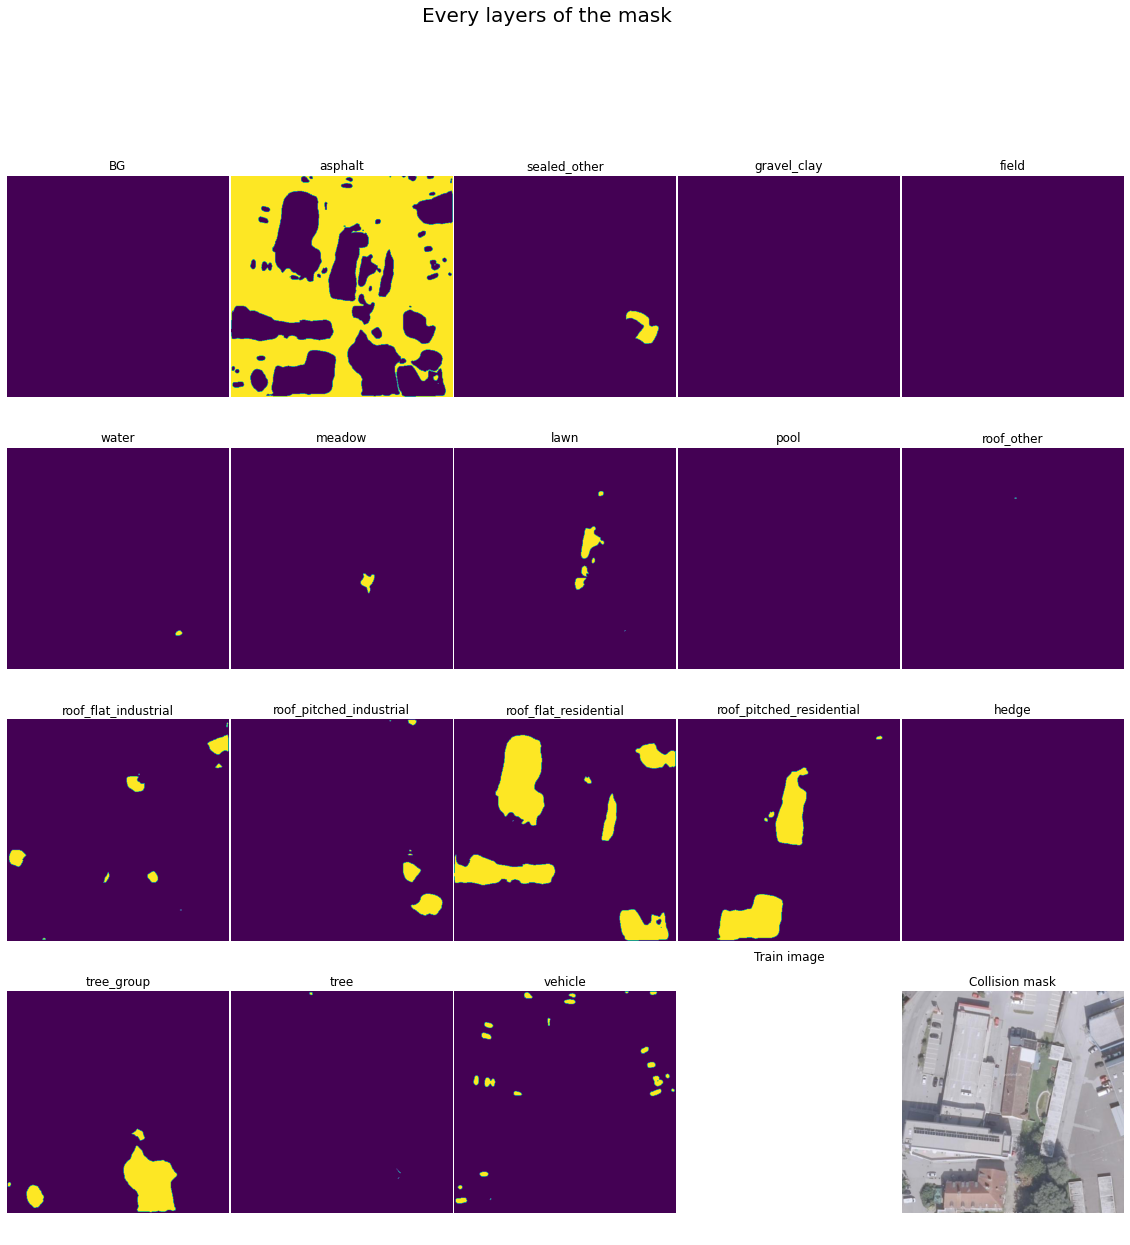

In [0]:
index = 22

img = imread(results[list(results.keys())[index]]['Img'])
pred = results[list(results.keys())[index]]['mask']

print(img.shape)
print(pred.shape)

for i in range(pred.shape[0]):
    for j in range(pred.shape[1]):
        index_of_max = np.argmax(pred[i,j,:], axis=-1)
        pred[i,j,:] = 0
        pred[i,j,index_of_max] = 1
pred = np.insert(pred, 0, np.zeros((512,512)), axis=2)

print("purple : true negative")
print("black purple : false positive")
print("yellow : false negative")
print("yellow-green : true positive")

#print("Dice score", DiceScore(img_mask, pred))
#print("Dice square score", DiceScore_square(img_mask, pred))


display_prediction_all_layers(pred, img)

In [0]:
for key in results.keys():
    pred = results[key]['mask']
    for i in range(pred.shape[0]):
      for j in range(pred.shape[1]):
          index_of_max = np.argmax(pred[i,j,:], axis=-1)
          pred[i,j,:] = 0
          pred[i,j,index_of_max] = 1
    results[key]['mask_l'] = pred
    
    # Aggregate all layers to one, if we have multiple labels for the same pixel, we take the highest based on the label order (17 > 1)
    results[key]['predicted_mask'] = convert_to_one_labelmatrix(results[key]['mask_l'], labels).astype(int)

purple : true negative
black purple : false positive
yellow : false negative
yellow-green : true positive

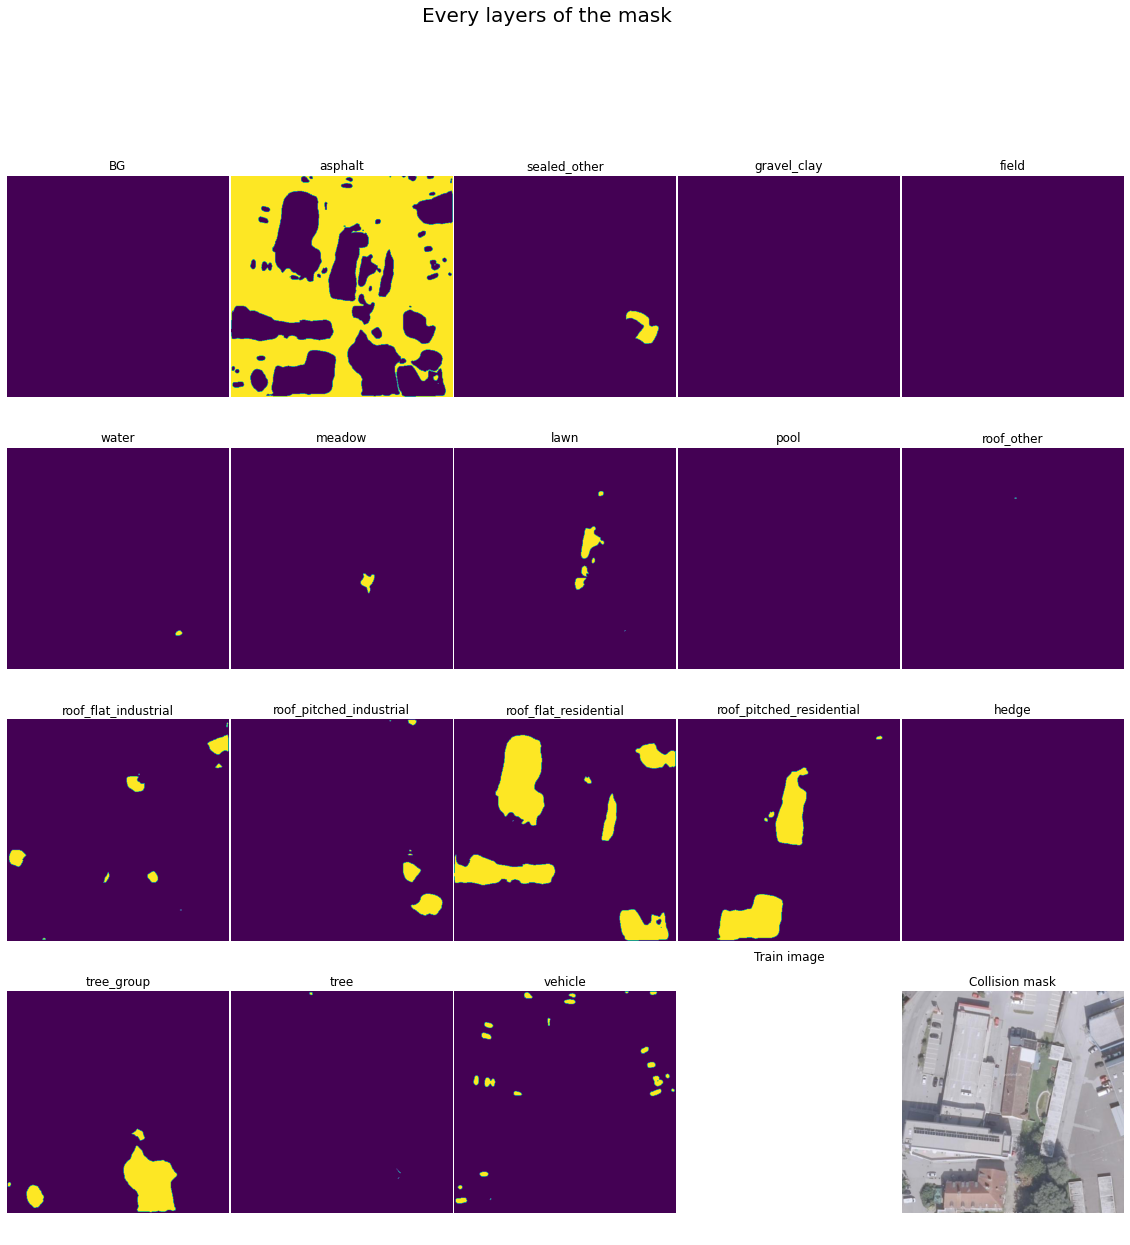

In [0]:
index = 22

img = imread(results[list(results.keys())[index]]['Img'])
pred = results[list(results.keys())[index]]['mask_l']
pred = np.insert(pred, 0, np.zeros((512,512)), axis=2)

print("purple : true negative")
print("black purple : false positive")
print("yellow : false negative")
print("yellow-green : true positive")

#print("Dice score", DiceScore(img_mask, pred))
#print("Dice square score", DiceScore_square(img_mask, pred))


display_prediction_all_layers(pred, img)

### Exercise

* Test different confidences and see how it affects the images
* Is one confidence for all classes enough, or might it be better to apply different confidence to different classes
* still, as in the previous session, the aggregation method is very simple, there might be better approaches

### Exercises

* What comparisons can we draw compared to the output of the first model
* Are there any areas/classes which might perform better in of the models compared to the other
* If so could we use that to our advantage?

In [0]:
for result in results.keys():
  results[result] = score_calculation(results[result], weather.values.tolist(), label_scores)

In [0]:
final_result = {}
for result in results.keys():
  final_result[result] = { your_key: results[result][your_key] for your_key in ["predicted_mask", "emmission_score", "solar_score", "biodiversity_score"] }
  final_result[result]["predicted_mask"] = final_result[result]["predicted_mask"].tolist()

In [0]:
import datetime
# save final results to result_dir (to be picked up for score/ leadeboard calculation)
final_result_path = str(str(TEAM_MOUNT) + f"data/results/{datetime.datetime.now():%Y%m%d_%H%M}.json")
# Serialize data into file:
with open(final_result_path, "w") as f:
  json.dump(final_result, f)                                                                                                                                                                                                                                                                                                                              

In [0]:
dbutils.fs.ls("/mnt/team32storage/data/results/")

Out[67]: [FileInfo(path='dbfs:/mnt/team32storage/data/results/.init', name='.init', size=0),
 FileInfo(path='dbfs:/mnt/team32storage/data/results/20211025_0040.json', name='20211025_0040.json', size=102871777),
 FileInfo(path='dbfs:/mnt/team32storage/data/results/20211028_0510.json', name='20211028_0510.json', size=83242246),
 FileInfo(path='dbfs:/mnt/team32storage/data/results/20211029_1941.json', name='20211029_1941.json', size=77183693),
 FileInfo(path='dbfs:/mnt/team32storage/data/results/20211101_0355.json', name='20211101_0355.json', size=100297757),
 FileInfo(path='dbfs:/mnt/team32storage/data/results/20211111_2221.json', name='20211111_2221.json', size=85201988)]